## Increase clustering resoluation (Seurat res 1)

object marker calculation, top gene and previous Braun et al marker gene visualisation
support cell type annotation

In [47]:
#load packages
suppressMessages({
    library(dplyr)
    library(tidyverse)

    #library(networkD3)
    library(ggplot2)
    library(ggrepel)
    #library(pheatmap)
    #library(grid)
    library(RColorBrewer)
    library(viridis)
    #library(cowplot)
    library(hrbrthemes)
    library(GGally)
    library(plotly)
    library(circlize)
    #library(scCustomize)
    library(patchwork)
    
    library(Seurat)
    library(scales)
    #library(reshape2)
    library(stringr)
    #library(magrittr)
})

plot_outdir<-".../Analysis_script/Output/Rev_plots/"


#for regulating plot sizes
pdim<-function(x,y){
    return(options(repr.plot.width=x, repr.plot.height=y))
}

#mycolor <- col_seu_default
cluster_color<-c("#377eb8", "#e41a1c", "#4daf4a", "#984ea3", "#ff7f00", 
                  "#ffff33", "#999999", "#f781bf", "#a65628", "#66c2a5", 
                  "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "#ffd92f", 
                  "#e5c494")

prediction_color <- list(
    Endo_Peri = c(190, 10, 10),
    #hMgl = c(217, 245, 7),
    NeuralProg = c(255, 35, 155),
    hRgl1 = c(252, 183, 26),
    hRgl3 = c(214, 194, 39),
    hRgl2 = c(250, 145, 45),
    hProgM = c(80, 235, 255),
    hProgBP = c(230, 140, 120),
    hProgFPL = c(210, 255, 215),
    hProgFPM = c(190, 235, 255),
    hNProg = c(255, 195, 28),
    hNbM = c(180, 140, 130),
    hNbML1 = c(130, 140, 140),
    hRN = c(199, 121, 41),
    hNbML5 = c(139, 101, 100),
    hDA0 = c(170, 180, 170),
    hDA1_2 = c(100, 100, 240),
    hNbGaba = c(40, 55, 130),
    hGaba = c(7, 121, 61),
    hSert = c(50, 180, 180),
    hOMTN = c(95, 186, 70),
    Unk = c(217, 245,   7)
)

In [132]:
obj<-readRDS(".../objects/2024Dec_Emilia_BCtracing_merged_clustered.rds")

In [379]:
# clone ID table and clone IDs that crossed time points were saved as csv from previous analysis
clone_merge<-read.csv(".../Analysis_script/Output/Emilia_EStracing_BCclone_table_merged.csv")
clone_cross_mat<-read.csv(".../Analysis_script/Output/Emilia_EStracing_BCclone_table_CrossTimepoints.csv")

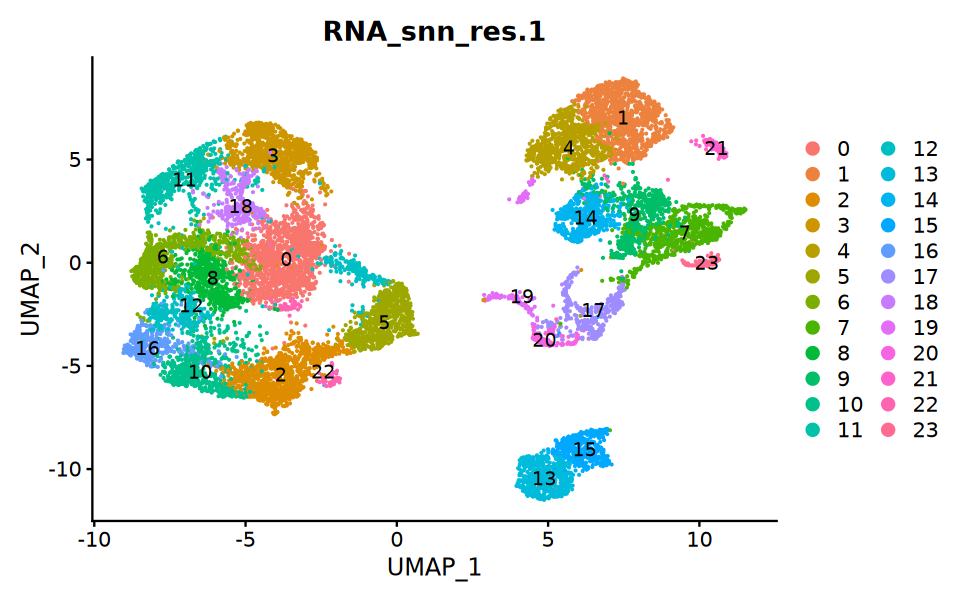

In [133]:
res1_cluster<-DimPlot(obj, group.by = "RNA_snn_res.1", label=TRUE)

pdim(8,5)
print(res1_cluster)

In [18]:
# Find markers and limit to those expressed in greater than 75% of target population
Idents(obj)<-"RNA_snn_res.1"

cluster_markers <- FindAllMarkers(object = obj, only.pos = TRUE, verbose = FALSE)

#seurat heatmap representation
cluster_markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10


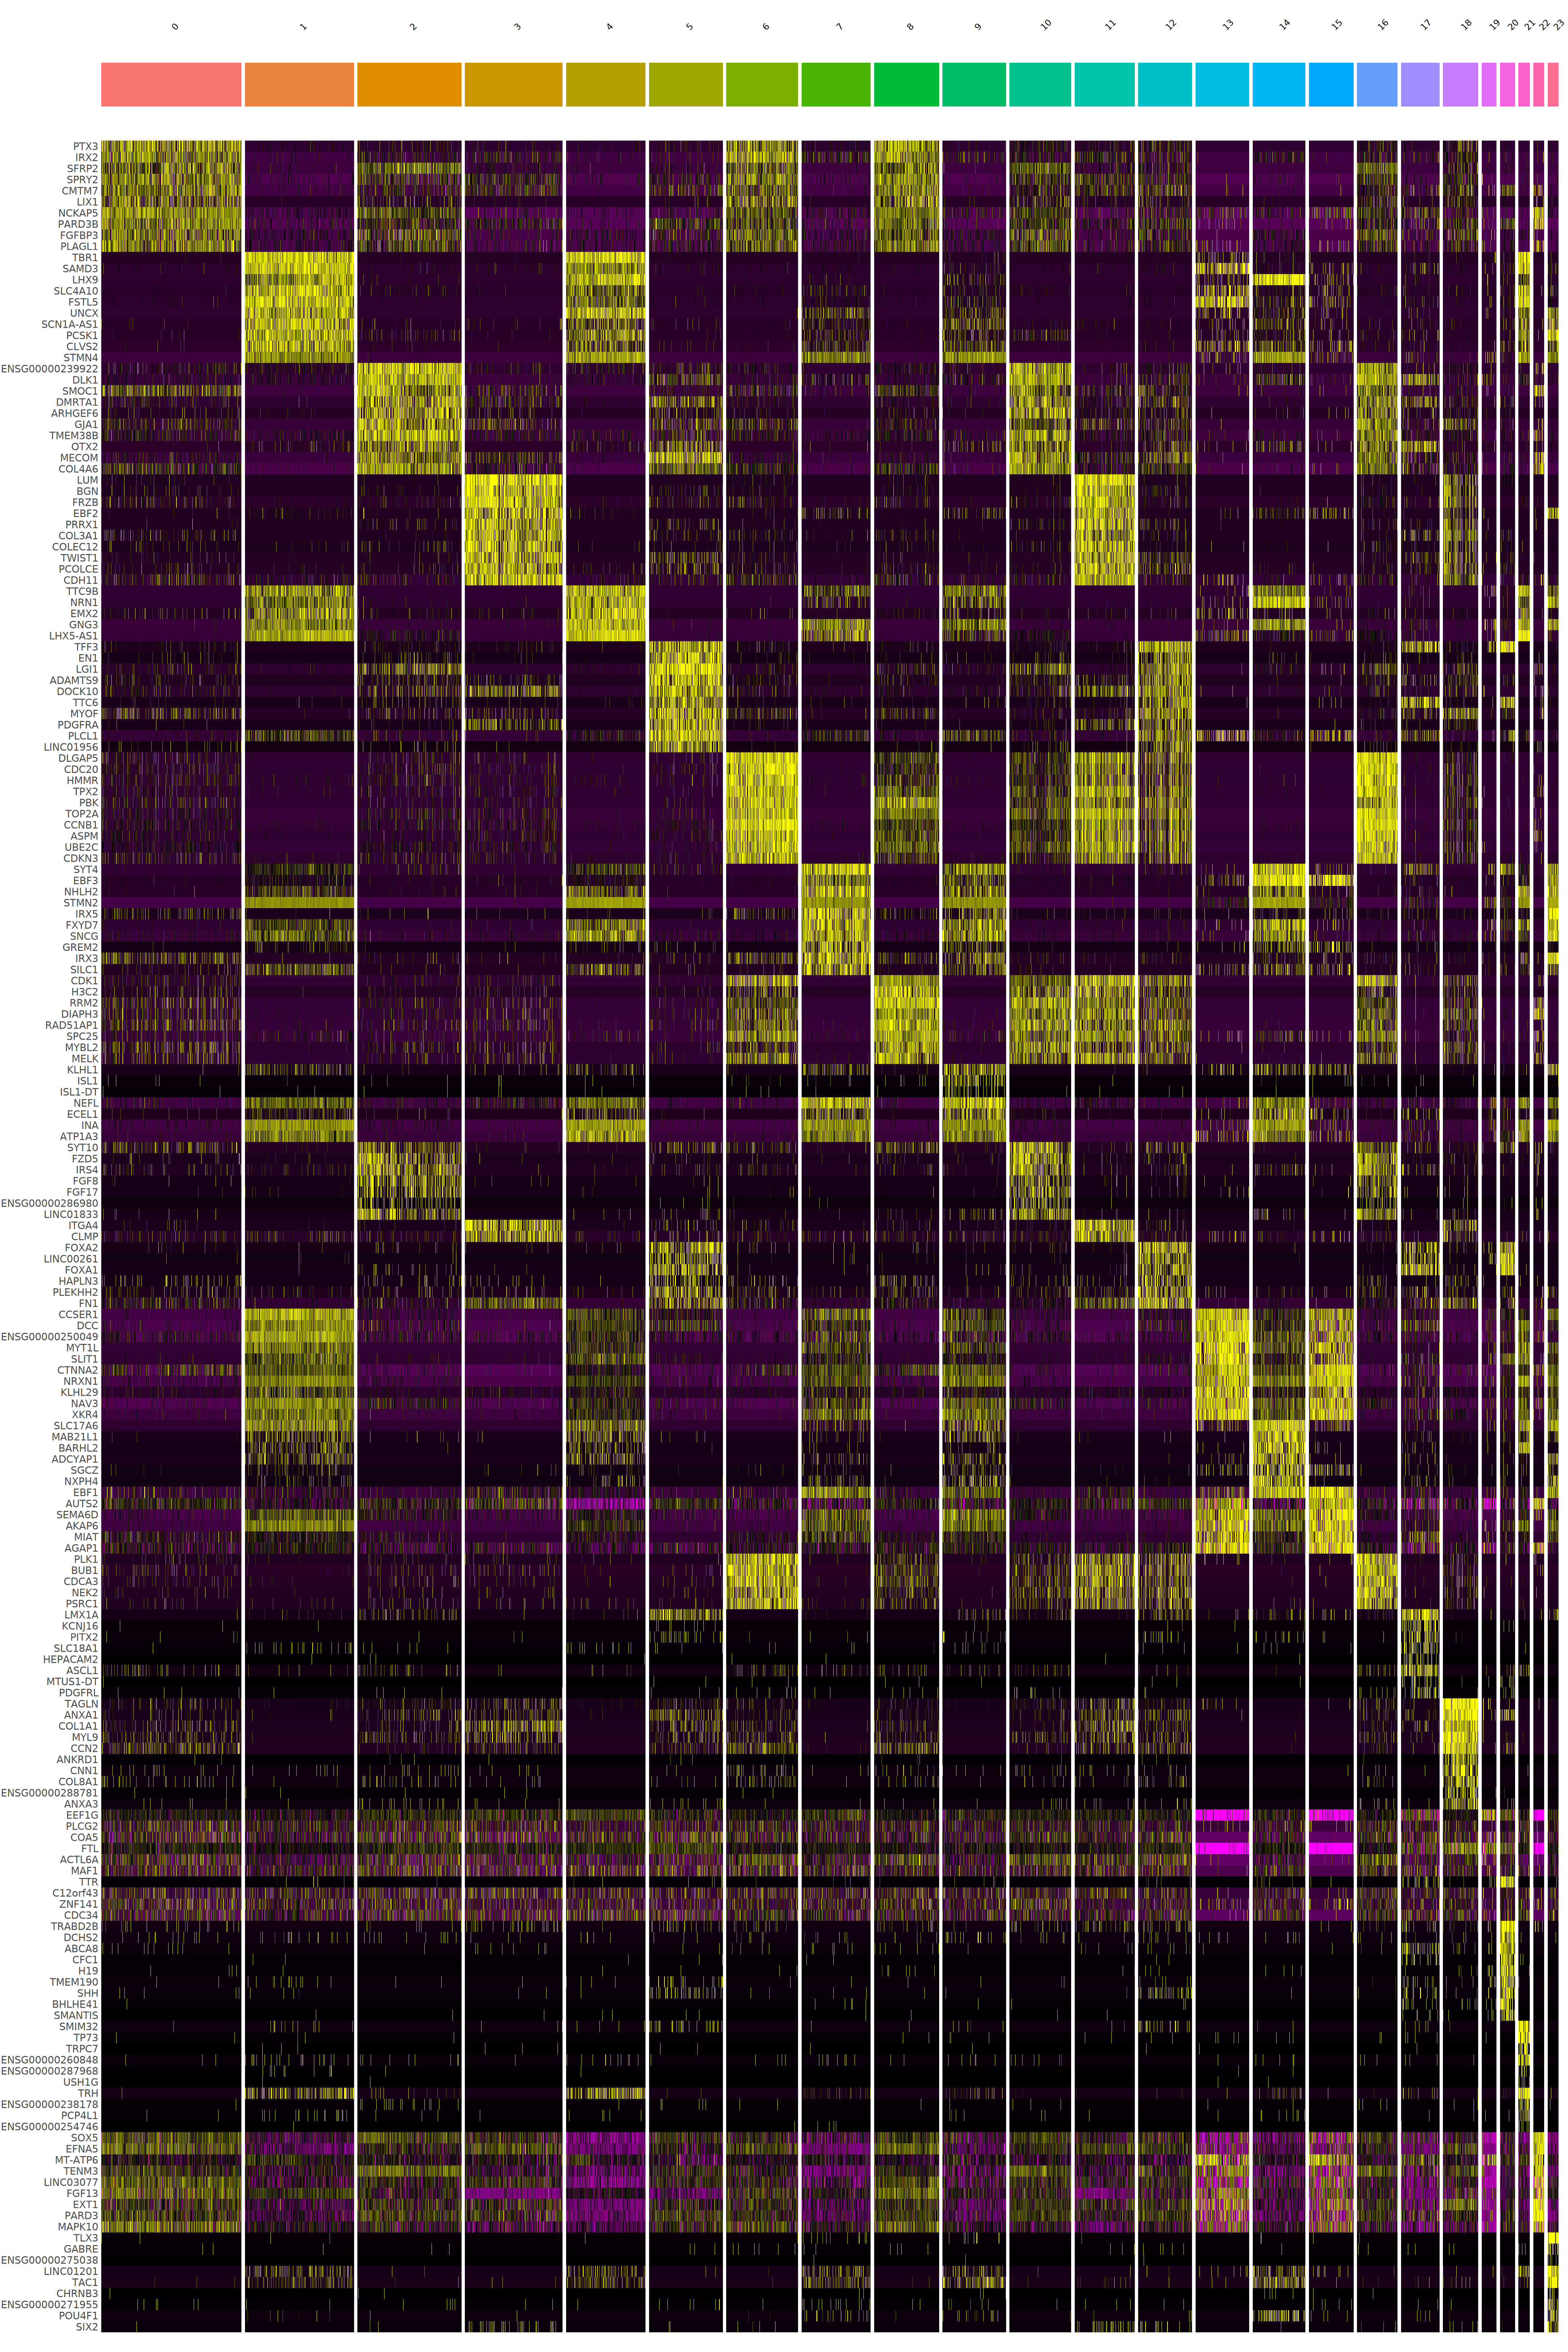

In [20]:
pdim(40,60)
top10_marker<-DoHeatmap(obj, features = top10$gene) + NoLegend() + theme(axis.text.y = element_text(size = 18))

print(top10_marker)

## final cell cluster annotations

### remove outlier cluster under res1.0, 13,15 and 19 identified from QC analysis

In [285]:
obj<-subset(obj, subset = RNA_snn_res.1 %in% c(13,15,19), invert = TRUE)

unique(obj@meta.data$RNA_snn_res.1)

[1] 18 6  0  2  11 3  12 10 9  5  8  22 16 17 7  14 4  1  21 20 23
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

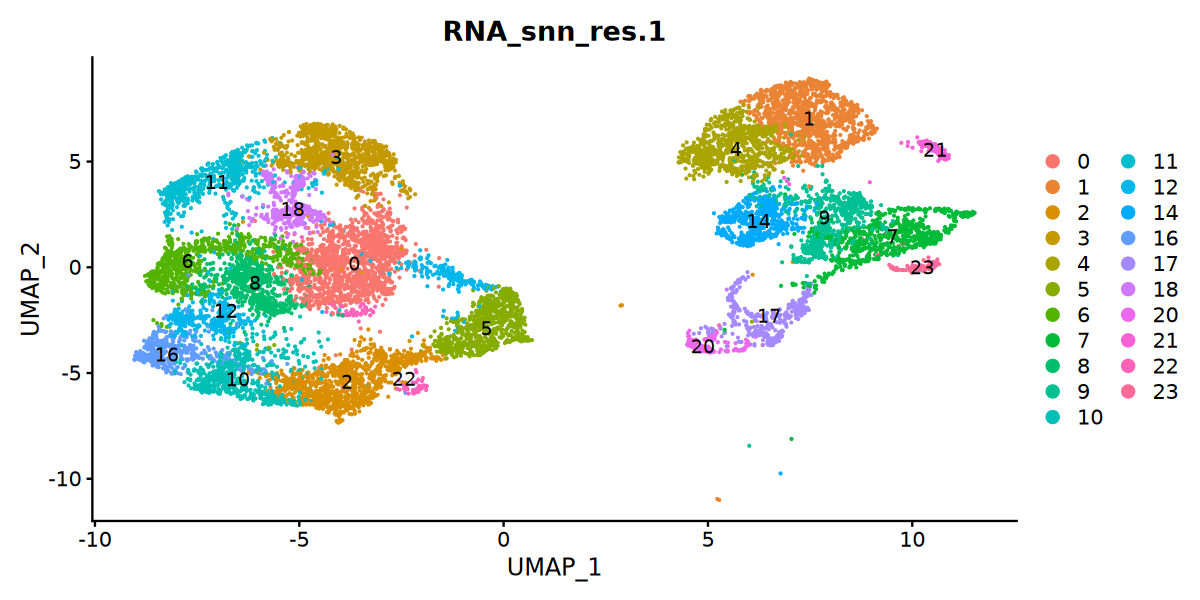

In [287]:
DimPlot(obj, group.by = "RNA_snn_res.1", label = TRUE)

In [312]:
obj@meta.data$Celltype_refine<-factor(obj@meta.data$RNA_snn_res.1, 
                                     levels = c(5,22,
                                               2,
                                               12,
                                               10,16,
                                               6,8,
                                               0,
                                                18,
                                               11,3,
                                               4,
                                               1,
                                               14,
                                               23,
                                               21,
                                               9,
                                                7,
                                                20,
                                                17
                                               ),
                                     labels = c("mFP-Rgl1","mFP-Rgl1",
                                               "non-FP-Rgl1",
                                                "ProgFP",
                                               "nonFP-Prog","nonFP-Prog",
                                               "ProgMHB", "ProgMHB",
                                               "Rgl2",
                                               "Transit-Rgl",
                                               "Gliogenic_Rgl","Gliogenic_Rgl",
                                               "NbML",
                                               "NbML",
                                               "NbGlut",
                                               "Glut_ML",
                                               "Glut_M",
                                               "OMTN",
                                               "NbGABA",
                                               "Rgl3",
                                               "NbDA"))

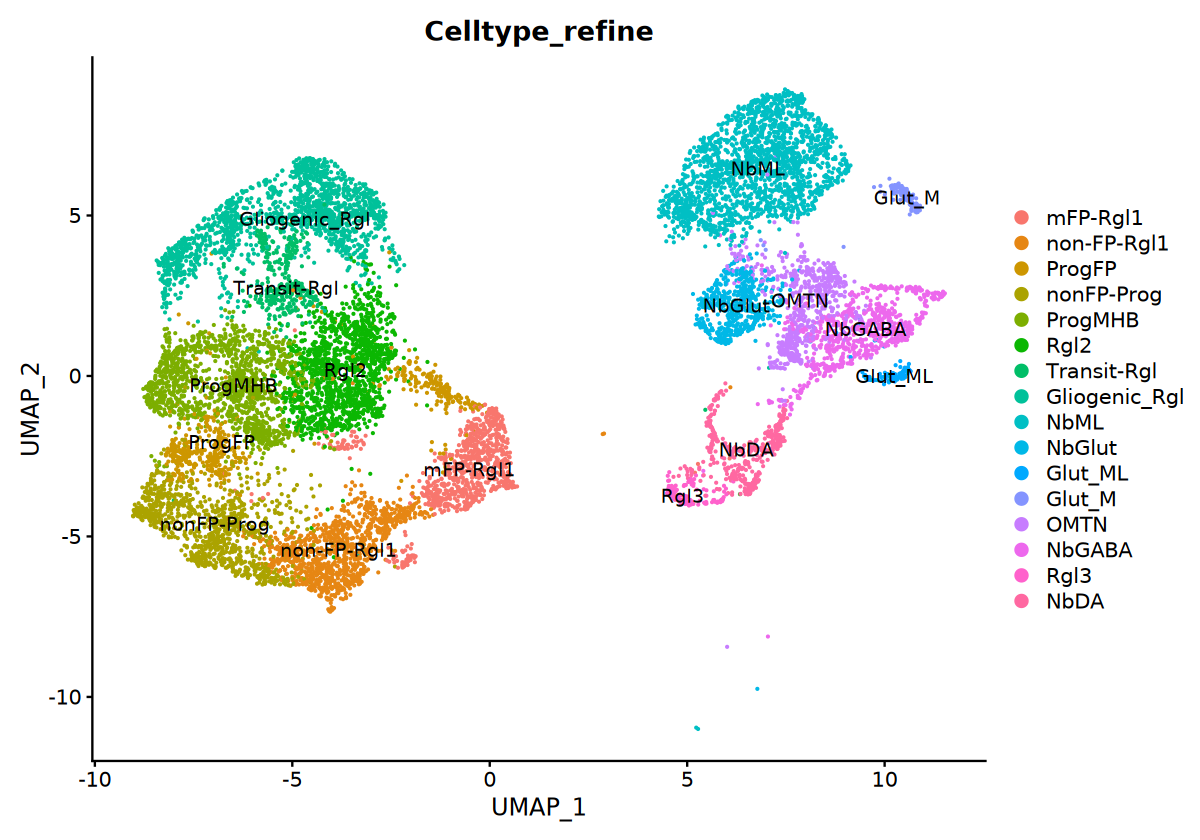

In [313]:
pdim(10,7)
DimPlot(obj, group.by = "Celltype_refine", label = TRUE)

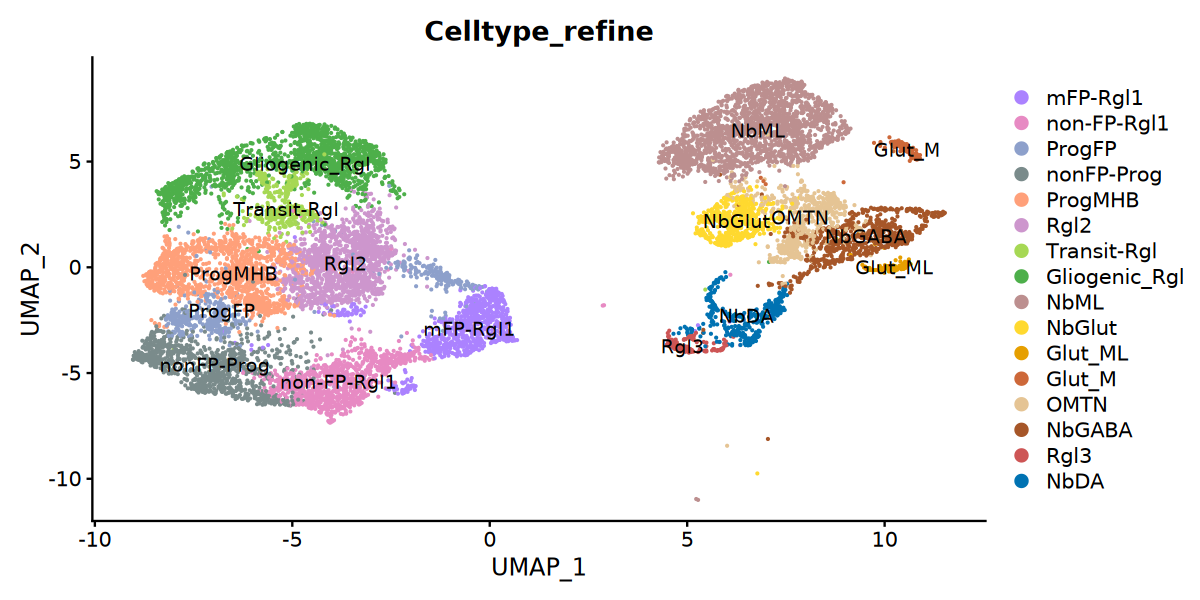

In [342]:
color_ting<-c("#AB82FF","#e78ac3",  "#8da0cb", "#7A8B8B","#FFA07A",
             "#CD96CD", "#a6d854", "#4daf4a", "#BC8F8F", "#ffd92f",
             "#E69F00", "#CD6839", "#e5c494", "#a65628", "#CD5555",
             "#0072B2")

pdim(10,5)
DimPlot(obj, group.by = "Celltype_refine", label = TRUE, cols = color_ting)

In [404]:
obj@meta.data$Celltype_refine_group<-factor(obj@meta.data$Celltype_refine, 
                                     levels = c("mFP-Rgl1",
                                                "ProgFP",
                                                "ProgMHB",
                                               "non-FP-Rgl1",
                                               "nonFP-Prog",
                                               "Rgl2",
                                               "Transit-Rgl",
                                               "Gliogenic_Rgl",
                                               "NbML",
                                               "NbGlut",
                                               "Glut_ML",
                                               "Glut_M",
                                               "OMTN",
                                               "NbGABA",
                                               "Rgl3",
                                               "NbDA"
                                               ),
                                     labels = c("hRgl1",
                                                "hRgl1",
                                                "ProgMHB",
                                               "LateralProg",
                                               "LateralProg", 
                                               "Rgl2",
                                               "Gliogenic_Rgl",
                                               "Gliogenic_Rgl",
                                               "NbML",
                                               "NbGlut",
                                               "Glut_ML",
                                               "Glut_M",
                                               "OMTN",
                                               "NbGABA",
                                               "Rgl3",
                                               "NbDA"
                                               ))

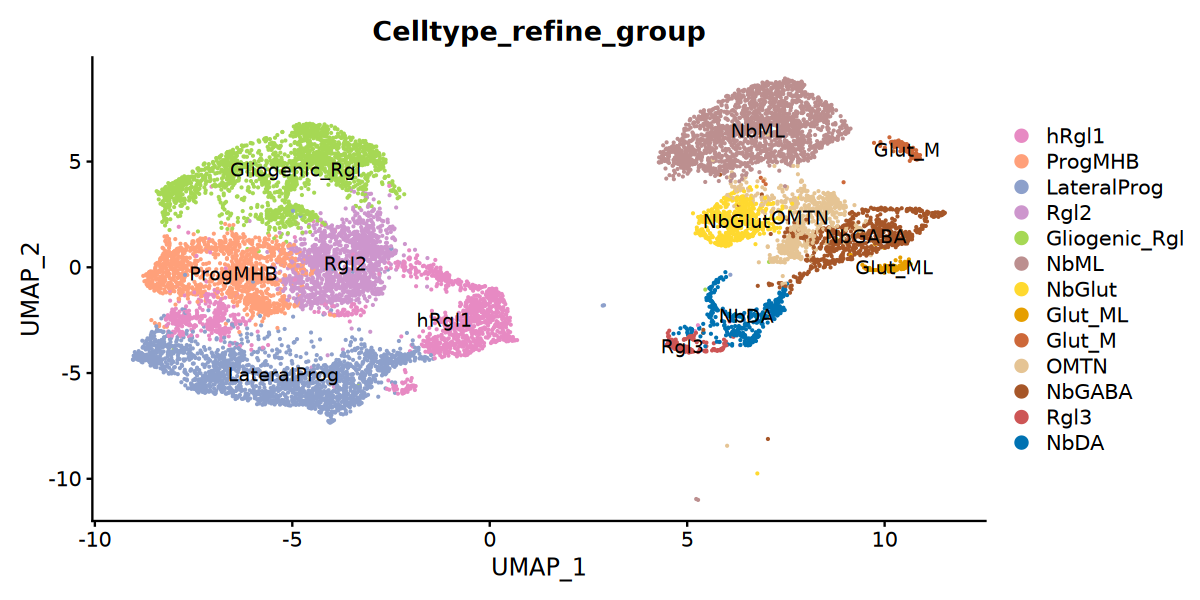

In [405]:
color_ting<-c(#"#AB82FF","#7A8B8B","#4daf4a",
    "#e78ac3","#FFA07A",  "#8da0cb", 
             "#CD96CD", "#a6d854",  "#BC8F8F", "#ffd92f",
             "#E69F00", "#CD6839", "#e5c494", "#a65628", "#CD5555",
             "#0072B2")

pdim(10,5)
DimPlot(obj, group.by = "Celltype_refine_group", label = TRUE, cols = color_ting)

In [344]:
genelist_refine <- c(
  #"Neuron vs. Rgl vs. progenitor",
  "SOX2", "FABP7", "VIM", "TOP2A", "HES1", "STMN2", "DCX", "HMGB1", #"RFX4",
  #"Rgl3 markers",
  "WNT5A", "NTN1", "SHH", "SPON1",
  #"Patterning markers",
  "EN1", "EN2", "GBX2", "LMX1A", "LMX1B", "FOXA1", "FOXA2", 
    "NKX6-1", "NKX6-2", #"BARHL1", 
    "OTX2", "PAX6", "PAX3",
  #"Neurotransmitter identity_DA",
  "DDC", "SLC18A1", "TH", "NR4A2", "PBX1", "LMO3",
  #"Neurotransmitter identity_Glut",
  "SLC17A6", "TBR1", "TAC1", "LHX1", "LHX5", "TRH", "EMX2", "POU4F1", "EBF1",
  #"Neurotransmitter identity_OMTN",
  "NEFL", "NEFM", "ISL1",
  #"Neurotransmitter identity_GABA",
  "GAD1",
  #"Gliogenic Markers",
  "SOX9", "SLC1A3", #"NFIA", 
    "CCN2", "THBS1",
  #"Immature Neuronal Markers",
  "ASCL1", "NEUROG1", "NEUROG2", "NHLH1", "NHLH2", "NEUROD1"
)

In [345]:
#data rescale after subset
obj<-ScaleData(obj, feature = rownames(obj))

Centering and scaling data matrix



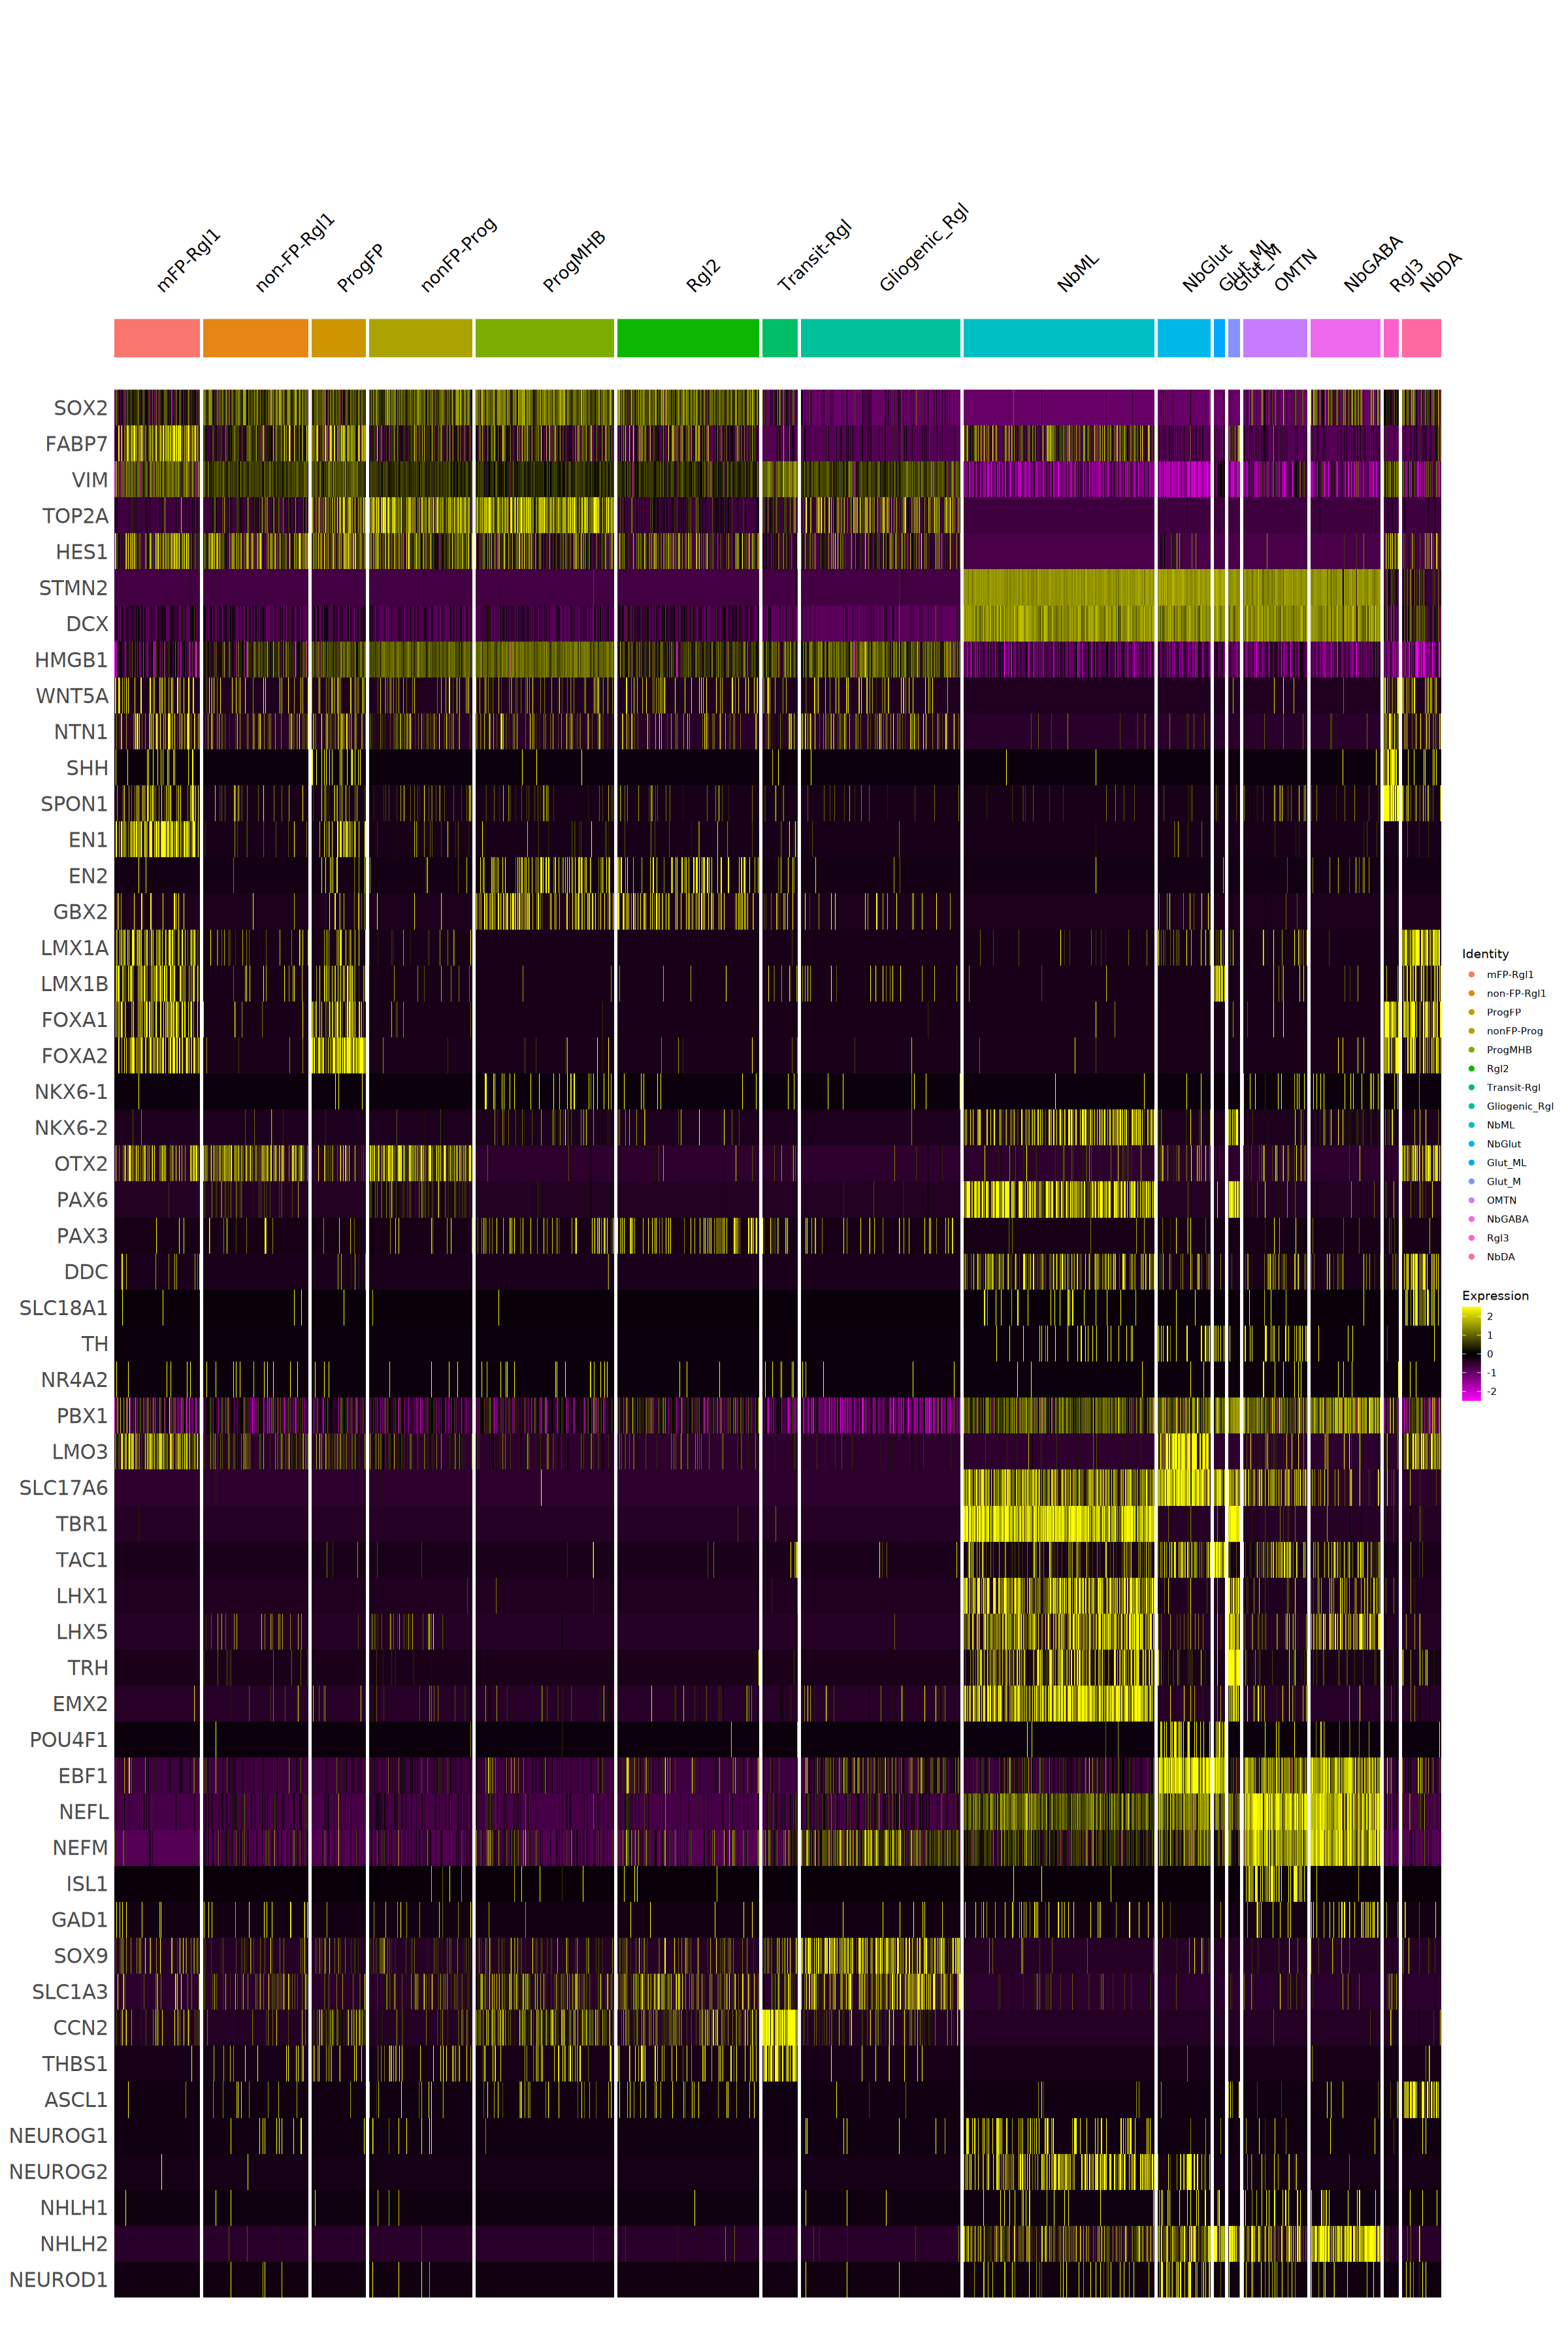

In [354]:
pdim(20,30)
DoHeatmap(obj, features = genelist_refine, group.by = c("Celltype_refine")
         )+ theme(axis.text.y = element_text(size = 18))

## Proceed with barcode visualisation on final data object
### Total barcode and replicated barcodes
### rep BC based on each Prog cluster

In [376]:
bcs<-obj@meta.data$Clone_ID[grep("Pos",obj@meta.data$Barcode)]

In [377]:
length(bcs)
length(unique(bcs))

[1] 10607

[1] 9493

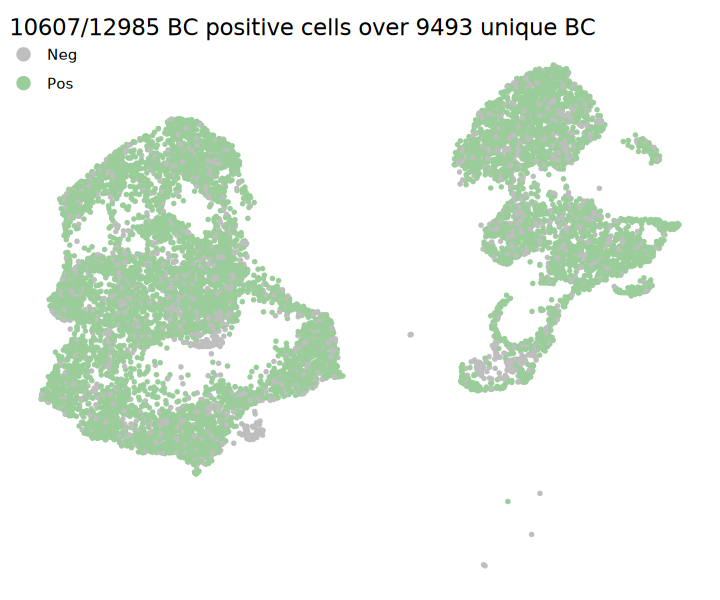

In [378]:
pdim(6,5)
bc_total<-DimPlot(obj, group.by = "Barcode", cols = c("gray", "#9BCD9B"), 
        pt.size = 0.5,
        label = FALSE)+
    theme_void()+
    theme(
    legend.position = c(0, 1),
    legend.justification = c("left", "top")  
    )+
    ggtitle("10607/12985 BC positive cells over 9493 unique BC")

print(bc_total)

In [401]:
# Check which values are in the row names
repbc_pos <- which(obj@meta.data$Clone_ID %in% clone_cross_mat$clone_nr )

In [393]:
obj@meta.data$Clone_rep<-NA
obj@meta.data$Clone_rep[repbc_pos]<-"Rep"

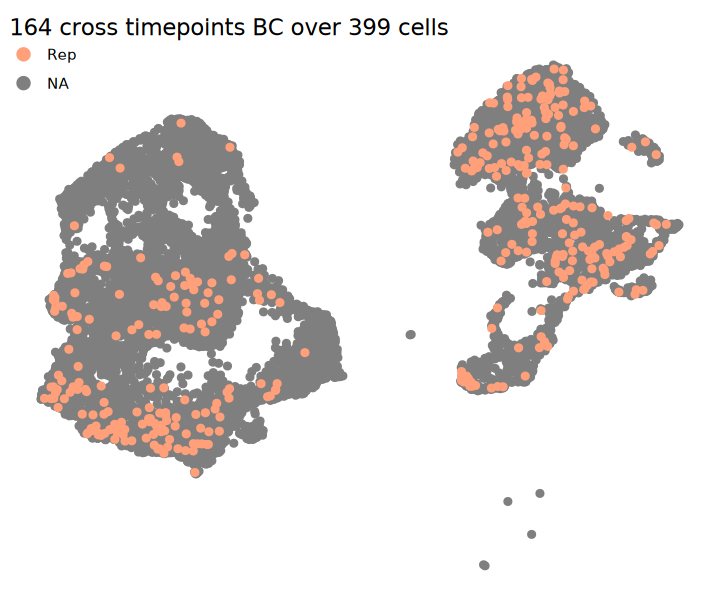

In [399]:
pdim(6,5)
bc_rep<-DimPlot(obj, group.by = "Clone_rep", cols = c("#FFA07A", "gray"), 
        pt.size = 1.5, order = TRUE,
        label = FALSE)+
    theme_void()+
    theme(
    legend.position = c(0, 1),
    legend.justification = c("left", "top")  
    )+
    ggtitle("164 cross timepoints BC over 399 cells")

print(bc_rep)